<a href="https://colab.research.google.com/github/kravchik84/py_samples/blob/master/group_by%2C%20rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
df.columns = df.columns.str.lower()
df["sex"] = [random.choice(["male", "female"]) for i in range(len(df))]

In [ ]:
df.head()

,date,births,sex
0,1959-01-01,35,male
1,1959-01-02,32,female
2,1959-01-03,30,female
3,1959-01-04,31,female
4,1959-01-05,44,male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
 2   sex     365 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.7+ KB


In [ ]:
df["date"] = pd.to_datetime(df["date"])

In [ ]:
pd.pivot_table(
    df,
    index="date",
    columns="sex",
    values="births",
    aggfunc="sum"
).resample("2M").sum()

sex,female,male
date,,
1959-01-31,761.0,452.0
1959-03-31,1147.0,1219.0
1959-05-31,1106.0,1297.0
1959-07-31,1367.0,1145.0
1959-09-30,1204.0,1593.0
1959-11-30,1145.0,1573.0
1960-01-31,546.0,768.0


In [ ]:
dates = pd.Series(["1990", "1991", "2010"])
dates

0    1990
1    1991
2    2010
dtype: object

In [ ]:
pd.to_datetime(dates)

0   1990-01-01
1   1991-01-01
2   2010-01-01
dtype: datetime64[ns]

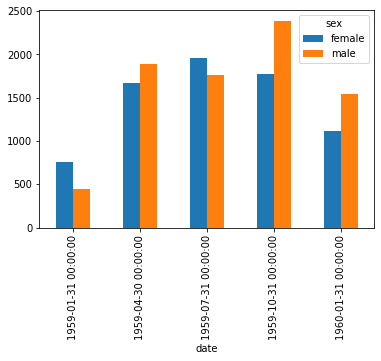

In [ ]:
pd.pivot_table(
    df,
    index="date",
    columns="sex",
    values="births",
    aggfunc="sum"
).resample("3M").sum().plot(kind="bar")

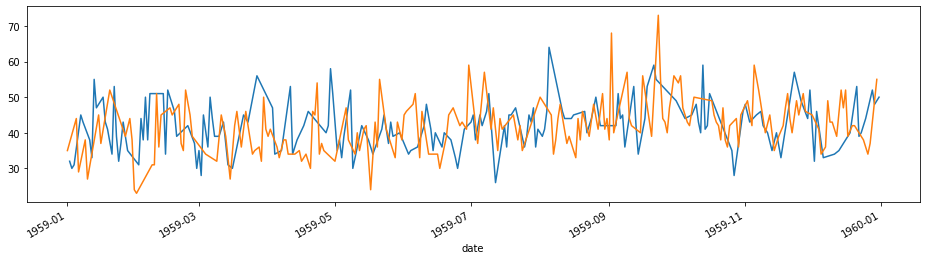

In [ ]:
fig, ax = plt.subplots(figsize=[16, 4])
df.set_index("date").groupby("sex")["births"].plot(ax=ax)
plt.show()

In [ ]:
df_pivot = pd.pivot_table(
    df,
    index="date",
    columns="sex",
    values="births",
    aggfunc="sum"
).resample("2M").sum().T

df_pivot

date,1959-01-31,1959-03-31,1959-05-31,1959-07-31,1959-09-30,1959-11-30,1960-01-31
sex,,,,,,,
female,761.0,1147.0,1106.0,1367.0,1204.0,1145.0,546.0
male,452.0,1219.0,1297.0,1145.0,1593.0,1573.0,768.0


In [ ]:
df_pivot["1959-01-31"].rank(method="dense", ascending=False)<5

sex
female    True
male      True
Name: 1959-01-31 00:00:00, dtype: bool

In [ ]:
df_pivot.rank(ascending=False) == 1

date,1959-01-31,1959-03-31,1959-05-31,1959-07-31,1959-09-30,1959-11-30,1960-01-31
sex,,,,,,,
female,True,False,False,True,False,False,False
male,False,True,True,False,True,True,True


In [ ]:
# Задача - получить для каждого года категорию (sex) с рангом == 1